In [47]:
import pandas as pd

In [48]:
from sklearn import datasets
iris = datasets.load_iris()

In [38]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [49]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [40]:
cols = iris.feature_names
print(cols)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [50]:
df = pd.DataFrame(iris.data, columns=cols)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df, iris.target)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
knn.score(X_test, y_test)

0.9736842105263158

In [73]:
y_pred = knn.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.93      0.97        15
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [86]:
cm = confusion_matrix(y_test, y_pred)

In [91]:
disp= ConfusionMatrixDisplay(cm, display_labels=iris.target_names)

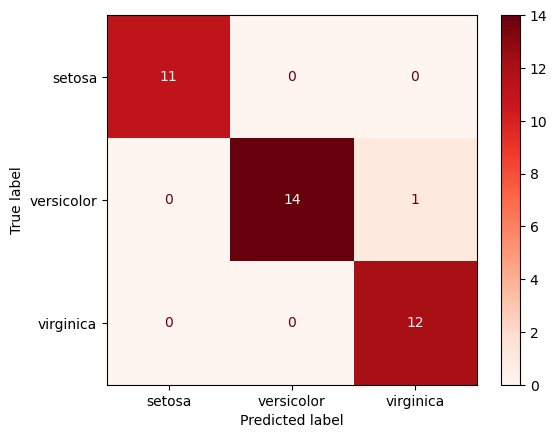

In [95]:
disp.plot(cmap="Reds")

Fold accuracy: 1.0000


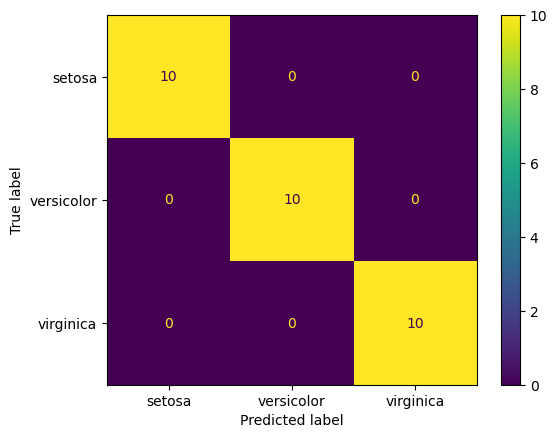

Fold accuracy: 0.9667


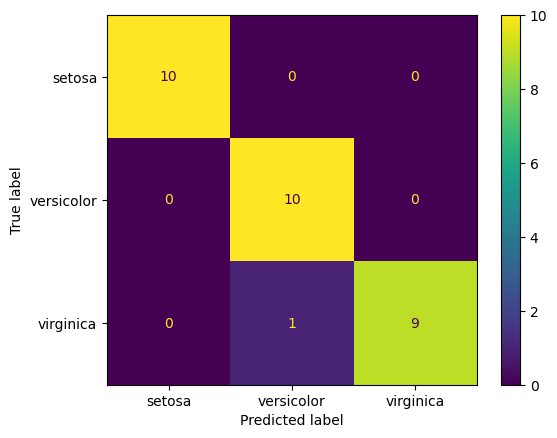

Fold accuracy: 0.8667


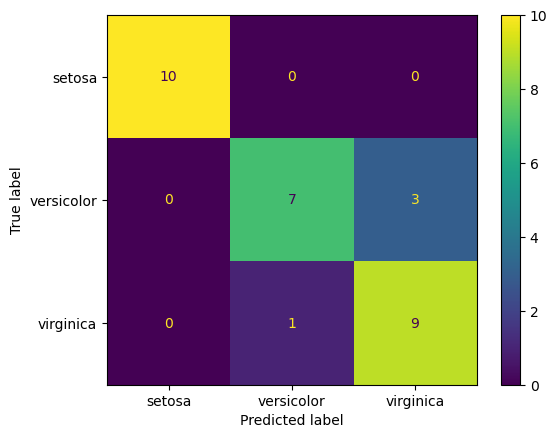

Fold accuracy: 1.0000


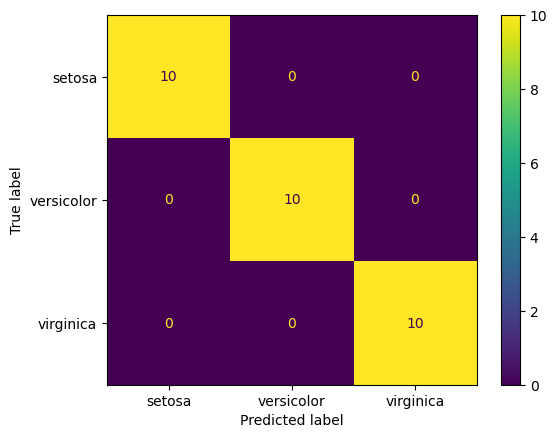

Fold accuracy: 0.9333


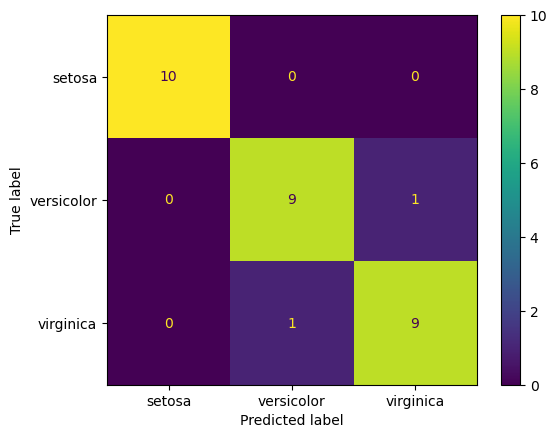

Average accuracy across folds: 0.9533


In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(df, iris.target):
    X_train, X_test, y_train, y_test = df.iloc[train_index], df.iloc[test_index], iris.target[train_index], iris.target[test_index]
    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)
    print(f"Fold accuracy: {acc:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp= ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
    disp.plot()
    plt.show()
    
print(f"Average accuracy across folds: {np.mean(accuracies):.4f}")